# Homework 1

In this assignment, we will be exploring the car dataset and analyzing their fuel efficiency. <br >
Specifically, we will do some exploratory analysis with visualizations, then we will build a model for Simple Linear Regression, a model for Polynomial Regression, and one model for Logistic Regression. <br >
**The given dataset is already modified and cleaned**, but you can find [the original information here.](https://archive.ics.uci.edu/ml/datasets/auto+mpg).

## Dataset Attribute Information

1. **mpg**: Miles per gallon. This is one primary measurement for car fuel efficiency.
2. **displacement** : The cylinder volumes in cubic inches.
3. **horsepower** : Engine power.
4. **weight** : In pounds.
5. **acceleration** : The elapsed time in seconds to go from 0 to 60mph.
6. **origin** : Region of origin.

### Libraries that can be used: numpy, pandas, scikit-learn, seaborn, plotly, matplotlib
Any libraries used in the discussion materials are also allowed.

#### Other Notes
 - Don't worry about not being able to achieve high accuracy, it is neither the goal nor the grading standard of **this** assignment. <br >
 - If not specified, you are not required to do hyperparameter tuning, but feel free to do so if you'd like.
 - Discussion materials should be helpful for doing the assignments.

In [1]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from IPython.display import display

In [2]:
df = pd.read_csv('./auto-mpg.csv')
print(df)

      mpg  displacement  horsepower  weight  acceleration  origin
0    18.0         307.0       130.0  3504.0          12.0     USA
1    15.0         350.0       165.0  3693.0          11.5     USA
2    18.0         318.0       150.0  3436.0          11.0     USA
3    16.0         304.0       150.0  3433.0          12.0     USA
4    17.0         302.0       140.0  3449.0          10.5     USA
..    ...           ...         ...     ...           ...     ...
387  27.0         140.0        86.0  2790.0          15.6     USA
388  44.0          97.0        52.0  2130.0          24.6  Europe
389  32.0         135.0        84.0  2295.0          11.6     USA
390  28.0         120.0        79.0  2625.0          18.6     USA
391  31.0         119.0        82.0  2720.0          19.4     USA

[392 rows x 6 columns]


# Exercises
## Exercise 1 - Exploratory Analysis (20 points in total)

### Exercise 1.1 - Correlation Matrix (10 points)
Generate a Pearson [correlation matrix plot](https://heartbeat.fritz.ai/seaborn-heatmaps-13-ways-to-customize-correlation-matrix-visualizations-f1c49c816f07) in the form of a heatmap. See the link to have an idea about what this visualization should look like. <br >
After generating the plot, answer the following question: <br >
**If we are going to predict ``mpg`` in Simple Linear Regression(i.e., $y=ax+b$), which attribute are you most UNLIKELY to pick as the independent variable? Explain why.**

Requirements & notes
 - When computing correlation, make sure to drop the column ``origin`` to avoid errors.
 - The computed correlation values should be shown on the plot.
 - Use a diverging color scale with the color range being \[-1, 1\] and center being 0 (if applicable).

## Rubrics for Exercise 1.1

| Topic | Points | Comments |
| --- | --- | --- |
| Calculate Pearson correlation coefficients | 2 | Should use Pearson |
| Visualize coefficients | 2 | Plot a heatmap |
| Annotate correlation values | 1 | Show pairwise Pearson values in the heatmap|
| Diverging color scale | 1 | As required |
| Choose the correct attribute | 2 | ``acceleration`` |
| Reasoning | 2 | Reason how the attribute is selected via Pearson |

### Notes

- Non-numerical attributes and the dependent variable itself, should not be chosen. But if you choose "origin" and "mpg", you can only earn the points by justifying your answer.
- To compare the linear correlation strength of different pairs of variables, you should take absolute values of Pearson coefficients. The answer considering signs when measuring the correlation strength is incorrect and will lose points.

#### Answer to the question
The ``acceleration`` attribute is the least possible one to be used for ``mpg`` prediction. <br >
This is because Pearson correlation measures the linear relationship between two attributes. Observed from the plot, the correlation between ``acceleration`` and ``mpg`` is around 0.4, while each of the other three attributes shares a correlation of roughly 0.8 with ``mpg``. <br >
In Linear Regression, we assume that the independent variable(s) share a linear relationship with the dependent variable. <br >
The finding in the plot implies that ``acceleration`` may lead to worse performance in Linear Regression, compared to other attributes.

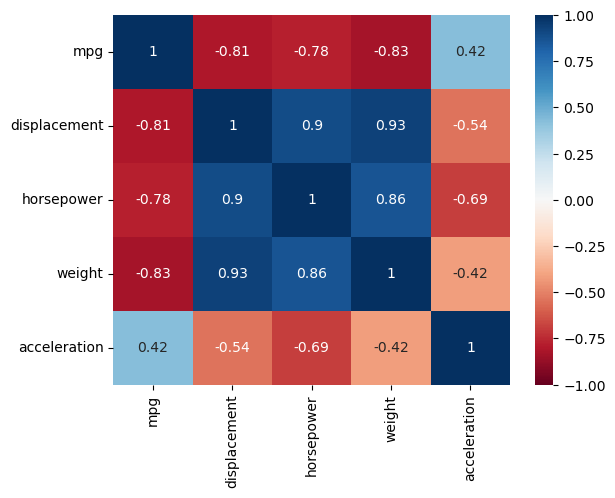

In [3]:
# Seaborn solution
data = df.copy().drop(columns=['origin']).corr()
_ = sns.heatmap(data, vmin=-1, vmax=1, center=0, annot=True, cmap= 'RdBu')

In [4]:
# Pandas solution
data = df.copy().drop(columns=['origin']).corr()
data.style.set_precision(3).background_gradient(cmap='RdBu', vmin=-1, vmax=1)

C:\Users\Anh Le\AppData\Local\Temp\ipykernel_15472\2982332879.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  data.style.set_precision(3).background_gradient(cmap='RdBu', vmin=-1, vmax=1)


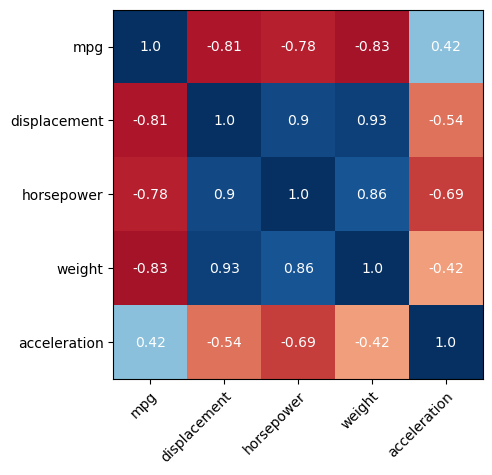

In [5]:
# Matplotlib solution
data = df.copy().drop(columns=['origin']).corr().round(2)
fig, ax = plt.subplots(1, 1)
im = ax.imshow(data, cmap='RdBu', vmax=1, vmin=-1)

ax.set_xticks(np.arange(len(data.columns))) # Positioning of the following texts 
ax.set_xticklabels(data.columns) # Texts that actually shown on axis

ax.set_yticks(np.arange(len(data.columns)))
ax.set_yticklabels(data.columns)

# Setting the plot properties, making the x-axis labels rotated.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Annotate the correlation values.
for i in range(len(data.columns)): # Rows
    for j in range(len(data.columns)): # Columns
        text = ax.text(j, i, data.iloc[i, j], ha="center", va="center", color="w")

plt.show()

In [6]:
#Plotly solution
import plotly.figure_factory as ff
data = df.copy().drop(columns=['origin']).corr().round(2)
fig = ff.create_annotated_heatmap(data.to_numpy(), x=list(data.columns), y=list(data.columns), colorscale='RdBu', zmin=-1, zmax=1)
fig.show()

### Exercise 1.2 - Pairplot (10 points)
Generate a pairplot(a.k.a. scatter plot matrix) of the given dataset. <br >
After generating the plot, answer the following question: <br >
**If we are using ``horsepower`` to predict ``mpg``, which method could lead to the best performance? (Linear Regression, Polynomial Regression, or Logistic Regression) Explain why.**

Note that there is no requirement on the diagonals. You can leave empty or use other representations based on your preference. However, having ``origin``-based grouped data distributions on the diagonals effectively helps you answer some questions in the later exercises.   

Requirements
 - The points should be colored based on the column ``origin``.

## Rubrics for Exercise 1.2

| Topic | Points | Comments |
| --- | --- | --- |
| Visualize pairplots | 5 | Each attribute of the 5 values 1 point |
| Group by ```origin``` for coloring (hue)  | 1 | As required |
| Choose the correct regression method | 2 | ```Polynomial Rgression``` |
| Reasoning | 2 | Reason why ```Polynomial Regression``` is the right answer |

#### Answer to the question
Polynomial Regression. <br >
From the scatter plot matrix, we can observe that ``mpg`` and ``horsepower`` share a non-linear relationship, which should be described the best by a convex function rather than a linear function. <br >
Logistic Regression is for bi-classification, so it should never be considered for numerical value prediction.

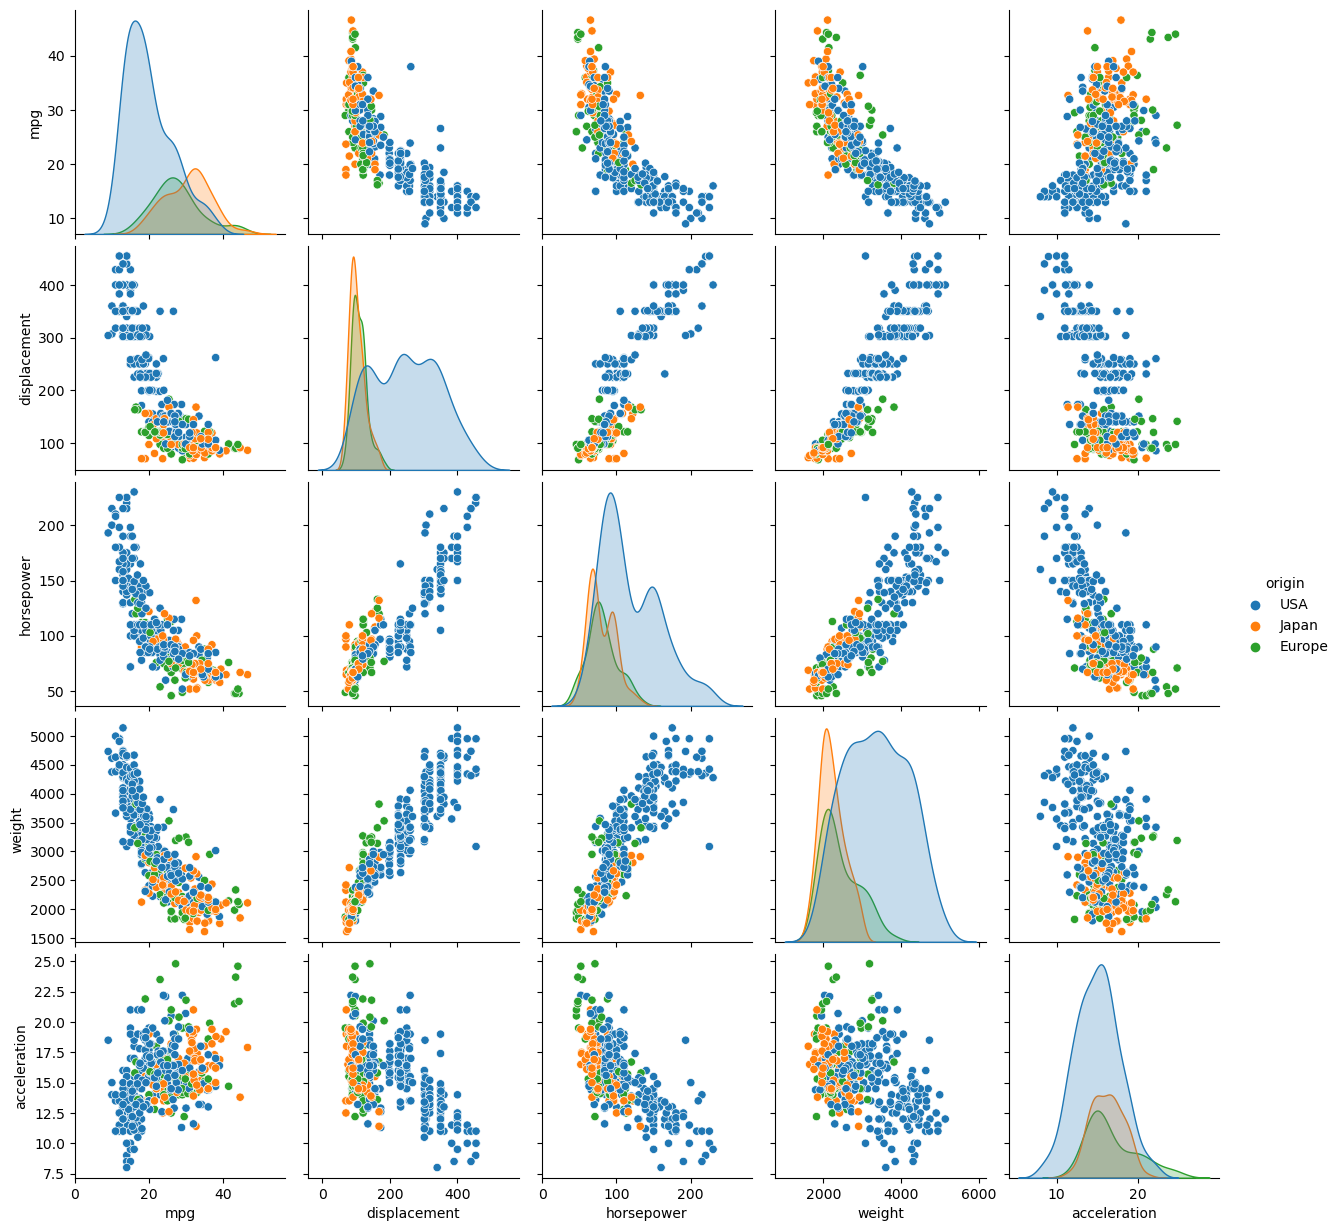

In [7]:
# Seaborn solution
_ = sns.pairplot(df, hue='origin', diag_kind='kde')

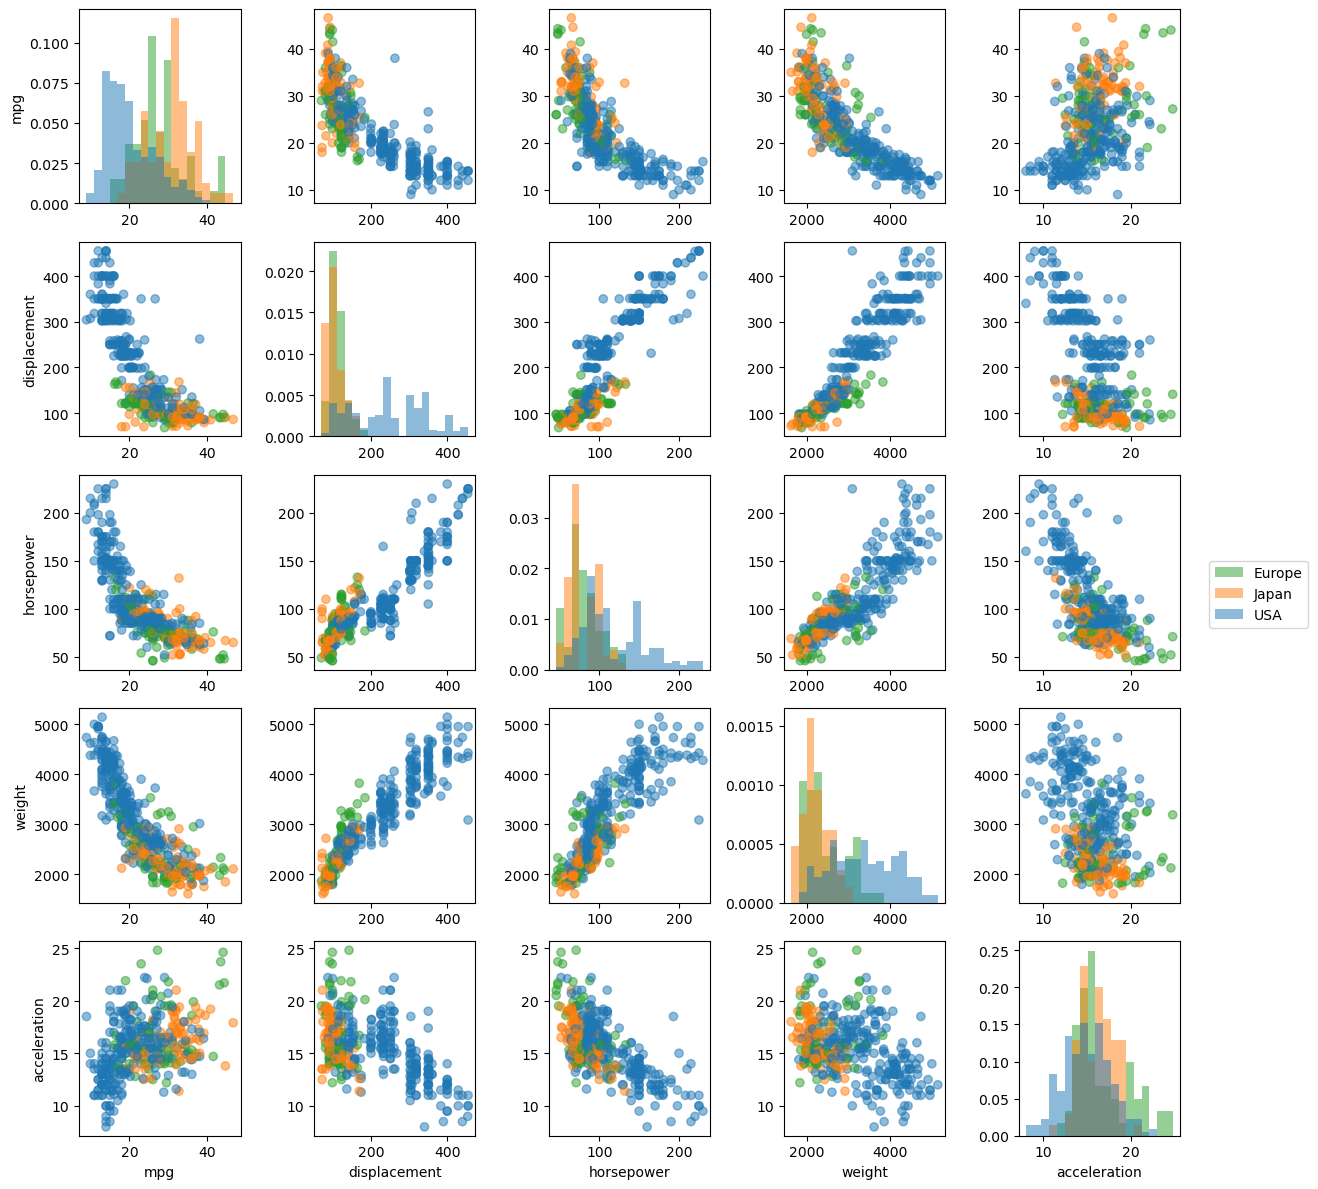

In [8]:
import matplotlib.colors
### Matplotlib solution
data = df.drop(columns=['origin'])
num_attrib = data.shape[1]

### Creating the same colormap in different ways, which will be explained in the later comments.
# 1)
colormap = {'USA': 'tab:blue', 'Japan': 'tab:orange', 'Europe': 'tab:green'}

# 2)
# One-time use categorical encoding. Please DON'T use it when you are encoding categorical attributes in future classes.
colors, codes = pd.factorize(df['origin']) # colors: [0, 1, 2, ...], codes: {'USA': 0, 'Japan': 1, ...} ~ ['USA', 'Japan', ...]
# If you want to use the named colors in Matplotlib to build your own colormap, this is probably the only way.
# The index in the list implies the mapping code. e.g., 'USA' -> 0 -> 'tab:blue'.
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("tab", ['tab:blue',"tab:orange","tab:green"])



fig, axs = plt.subplots(nrows=num_attrib, ncols=num_attrib, figsize=(12, 12), tight_layout=True)

for i in range(0, num_attrib): # Rows
    for j in range(0, num_attrib): # Columns
        # Diagonals - overlapping histograms 
        if i == j:
            attrib = data.columns[i]
            # Grouping data based on 'origin', and prepare the arguments I need to use later.
            groups = [{ 'data': group[attrib], 'color': colormap[region_name], 'label': region_name } for region_name, group in df.groupby('origin')]
            #### Histograms
            # Make sure all the groups share the same bin size and the same data range.
            # Otherwise, your overlapped histograms will look weird, like _ = sns.pairplot(df, hue='origin', diag_kind='hist').
            bins = np.linspace(data[attrib].min(), data[attrib].max(), 20)
            # Having density argument toggled on will help integrate the data range on y-axis. 
            # And it's basically kernel density estimation now, but in a histogram.
            for group in groups: 
                axs[i, j].hist(group['data'], bins, density=True, color=group['color'], alpha=0.5, label=group['label'])
            #
            # Note: If you want "overlapping", looping through each group and plot them respectively is the only way.
            #       Otherwise, usually you will just get a grouped or juxtaposted histogram.
            #
        # Others - scatter plot
        else:
            # On the same row, we want to keep the attribute on y-axis the same.
            axs[i, j].scatter(x=data.iloc[:, j], y=data.iloc[:, i], c=colors, cmap=cmap, alpha=0.5)

        # Uncomment this auxiliary info if you wanna know how i and j in subplots work.
        #axs[i, j].set_title(f'i:{i}, j:{j}')
        
        # Setting labels on different axes
        if i == 4:
            axs[i, j].set_xlabel(data.columns[j])
        if j == 0:
            axs[i, j].set_ylabel(data.columns[i])
    
    # I snuck a trick to grab what I need for plotting the legend, because of the way I created the scatter plot.
    # Handles involve more object concepts in Matplotlib, you don't really need to know about it. 
    # But if interested, go here: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html#matplotlib.pyplot.legend
    handles, labels = axs[i, j].get_legend_handles_labels()

# Note: bbox_to_anchor overwrites the argument in loc, loc is usually recommended as it provides default positions.
fig.legend(handles, labels, loc='center right', bbox_to_anchor=(1.1, 0.5))
plt.show()

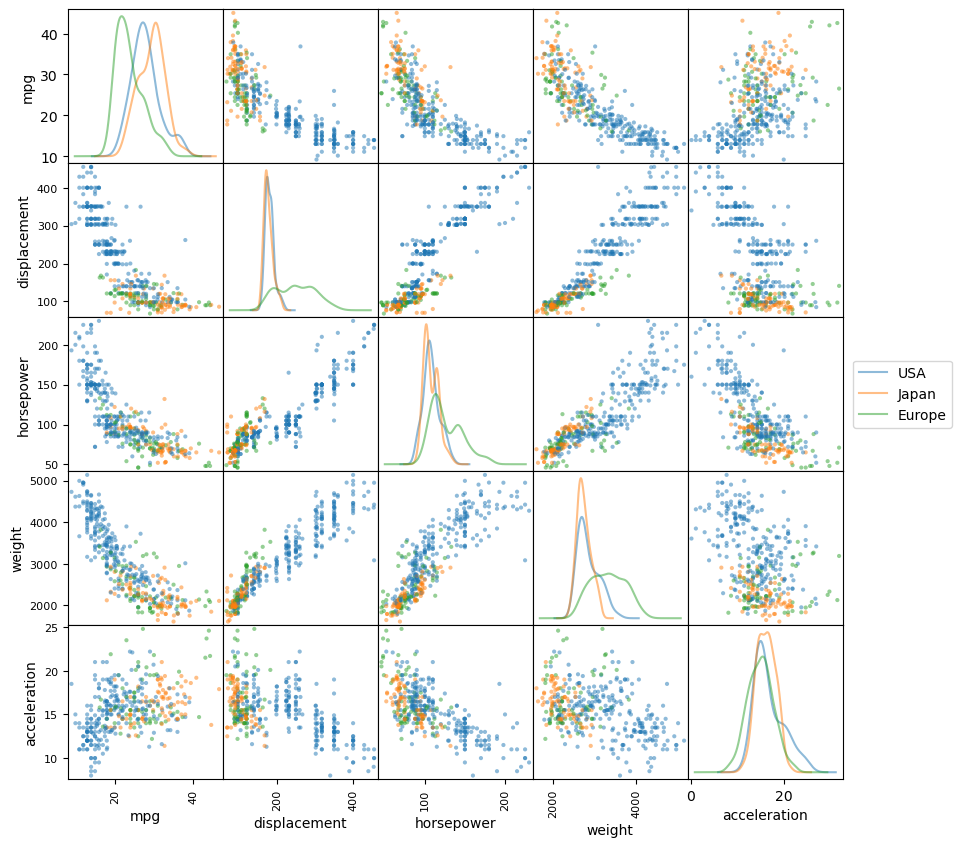

In [9]:
import matplotlib.ticker as mticker
### Pandas solution
data = df.drop(columns=['origin'])
# Create customized colormaps, the same as above.
colors, codes = pd.factorize(df['origin'])
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("tab", ['tab:blue',"tab:orange","tab:green"])

axs = pd.plotting.scatter_matrix(df, c=colors, diagonal='hist', cmap=cmap, figsize=(10, 10))

#### Technically, you can stop here, even though the histograms are for the whole data.

# If you want to fix visualizations on the diagonals, we have to wipe them first.
# Note that because this is from pandas interface, so setting up colormaps and legends is different and relatively easier. (Pandas already took care of most work)
# However, most of the time here, I am fixing the axes because of Pandas being too high-level as well.
for i in range(0, data.shape[1]):
    # This is for setting the finalied axes correctly.
    if i == 0: # mpg corner
        ticks = axs[i, i].get_yticks()
        ticklabels = axs[i, i].get_yticklabels()
        
    #### Actual fixing visualizations part.
    axs[i, i].clear() # Clean all the plotting objects in this subplot
    attrib = data.columns[i]
    for label, group in df.loc[:, [attrib, 'origin']].groupby('origin'):
        group.plot(kind="kde", ax=axs[i,i], legend=False, alpha=0.5)
    
    # The following is all for fixing axes.
    handles, _ = axs[i, i].get_legend_handles_labels()
        
    if i == 0: # mpg corner 
        # The reason why this is a huge chunk: 
        # I have to change the axis labels without touching the axis ticks. 
        # Because once I touched the ticks, this plot will be compressed and show something wrong.
        updated_labels = axs[i, i].get_yticklabels()
        for original, update in zip(ticklabels, updated_labels[1:-1]):
            update.set_text(original.get_text()) # Update the text labels
    
        # Make sure we are fixating the ticks first, then setting the ticklabels next.
        # In Matplotlib, you always have to update both ticks and ticklabels to avoid any warnings.
        ticks_loc = axs[i, i].get_yticks().tolist()
        axs[i, i].yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
        axs[i, i].set_yticklabels(updated_labels)
    else:
        axs[i, i].set_yticks([])
    
    # Setting the attribute labels
    axs[i, i].set_ylabel('')
    if i == data.shape[1]-1: axs[i, i].set_xlabel(attrib)
    if i == 0:  axs[i, i].set_ylabel(attrib)

# The bbox_to_anchor here is a very ugly fix, please don't follow this :)
_ = plt.legend(handles, ['USA', 'Japan', 'Europe'], loc='center right', bbox_to_anchor=(1.75, 2.5))

In [10]:
# Plotly solution
fig = ff.create_scatterplotmatrix(df, diag='histogram', index='origin', width=1000, height=1000, opacity=.8)
fig.show()

## Exercise 2 - Linear and Polynomial Regression (30 points in total)

### Exercise 2.1 - Splitting Dataset (5 points)
Split the data into training and testing set with the ratio of 80:20.

## Rubrics for Exercise 2.1


| Topic | Points | Comments |
| --- | --- | --- |
| Split the data as required | 5 | Produce the training and test set |
| Wrong split ratio | -2 | Should split with the given ratio 80:20 |
| Wrong data source | -3 | Should use the entire dataset given|
| Wrong attributes | -2 | Should use the correct label, and remove label in inputs |
| Inconsistency | -1 | The training and test set attributes should be consistent |

In [11]:
train, test = train_test_split(df, test_size=0.2, random_state=21)
X_train, y_train = train.drop(columns=['mpg', 'origin']) ,train['mpg']
X_test, y_test = test.drop(columns=['mpg', 'origin']), test['mpg']

### Exercise 2.2 - Simple Linear Regression (10 points)
Using one of the other attributes(excluding ``origin``) by your choice, please build a simple linear regression model that predicts ``mpg``. <br >

Requirements
 - Report the testing MSE error.

## Rubrics for Exercise 2.2

| Topic | Points | Comments |
| --- | --- | --- |
| Use the correct data split for training | 1 | Use the training set |
| Build a **Simple** LR model | 5 | Either from scratch or with built-ins |
| Calculate MSE correctly | 3 | Should use the right formula/built-ins |
| Report testing MSE | 1 | Use the test set for MSE and report |
| Build other models rather than Simple LR | -2 | Should use Simple LR as required |


In [12]:
choice = 'horsepower'
X_train, X_test = X_train[choice], X_test[choice]

In [13]:
from sklearn import preprocessing

lr = LinearRegression()
# Note that, .reshape() is only applied when we are working with one column data.
# It is to convert a vector to a matrix essentially. See @66 on Piazza for details.
lr.fit(np.asarray(X_train).reshape(-1, 1), np.asarray(y_train).reshape(-1, 1))

predicted = lr.predict(np.asarray(X_test).reshape(-1, 1))
print(f'Testing MSE error is: {round(mean_squared_error(predicted, np.asarray(y_test).reshape(-1, 1)), 4)}')

Testing MSE error is: 23.2049


### Exercise 2.3 - Polynomial Regression (15 points)
Build polynomial regression models that predict ``mpg`` with the same choice in 2.2. <br >
Specifically, from degree=2 to degree=4, build one respectively. <br >
Then, based on the reported errors from only these three degrees, **do you think there is a sign of overfitting? Provide your reasoning.**


Requirements
 - Report the training MSE error for each of the three degrees.
 - Report the testing MSE error for each of the three degrees.


## Rubrics for Exercise 2.3

| Topic | Points | Comments |
| --- | --- | --- |
| Build Polynomial Regression models | 5pt ($\times 3$) | Each model (degree 2, 3 and 4) values 5 points |
| Report training and test MSE | 4 | As required |
| Correct conslusion | 2 | Draw the right conclusion based on MSE |
| Reasoning | 4 | Reason why there is (not) overfitting |
| Use wrong splits for training | -2 | Should use the training set |
| Not report training MSE | -1 | As required |
| Not report test MSE | -1 | As required |
| Not use MSE for reasoning | -2 | Should use MSE only as required |
| Insufficient reasoning | -2 | Should apply at least one of the signs of overfitting to draw the conclusion |
| Inaccurate or contradictory reasoning | -2 | Reasoning is irrelevant, or contradictory to the conclusion |

#### Answer to the question

This part is case by case, we will grade based on your reported errors. <br >

A couple of signs of overfitting:

 - Coefficients values are unreasonably large compared to the ranges in the data.
 - Number of coefficients/attributes is similar to the number of training instances, such that each coefficient can be trained to describe one instance.
 - Training error dropped a lot over epochs/configs.
 - Testing error increased a lot over epochs/configs.
 - Training error is going down over epochs/configs, while at the same time, testing error is going up.

Note that the problem statement said "based on the reported errors from only these three degress", your reasoning has to include any of the last three signs to receive credits.

In the following case, because we observe the training error has a downward trend as the degree increases, whereas the testing error has a upward trend at the same time. We may conclude that there is a sign of overfitting. <br >
On ther other hand, if you feel the differences between the degrees are so small that they are more like noises, then you may also conclude that there is no sign of overfitting.

In [14]:
for idx in range(2, 5):
    poly = PolynomialFeatures(degree=idx, include_bias=False)
    X_poly = poly.fit_transform(np.asarray(X_train).reshape(-1, 1))
    plr = LinearRegression()
    # Note that I didn't do reshape on X_poly as it's already a matrix.
    plr.fit(X_poly, np.asarray(y_train).reshape(-1, 1))
    
    predicted = plr.predict(poly.transform(np.asarray(X_test).reshape(-1, 1)))
    
    coef = pd.DataFrame(plr.coef_, columns=[f'b{i+1}' for i in range(idx)])
    coef.insert(loc=0, column='b0', value=plr.intercept_)
    coef = coef.style.format("{:10,.10f}")
    display(coef)
    
    print(f'Polynomial regression with degree = {idx}')
    print(f'Training MSE error is: {round(mean_squared_error(plr.predict(X_poly), y_train),4)}')
    print(f'Testing MSE error is: {round(mean_squared_error(predicted, y_test),4)}')
    print('\n')

Polynomial regression with degree = 2
Training MSE error is: 19.5135
Testing MSE error is: 16.9105




Polynomial regression with degree = 3
Training MSE error is: 19.449
Testing MSE error is: 16.9881




Polynomial regression with degree = 4
Training MSE error is: 19.3437
Testing MSE error is: 17.1036




## Exercise 3 - Overfitting and Underfitting (25 points in total)
The fitting dataset contains the actual train and test data spread for a model along with three rotations of the same. The dataset is provided in the Canvas file.

### Exercise 3.1 - sse and variance (15 points)
Calculate the sse and variance for the three predictions based on the actual data.<br >
Show the calculation for the above metrics.<br >
Highlight the values you get for all three predictions and the actual data. 

#### Answer to the question

In [1]:
import numpy as np

#Basically looking at the trend of sse and variance they have to justify which is overfitting which is general and which is underfitting

import numpy as np

y_actual_train = np.array([ 0.31, 0.39, 0.22, 0.16, -0.88, 0.79, 0.6, -0.76, 0.1, -0.22, -0.86, -0.28, -0.14, 0.67, -0.42, -0.86, 0.83, -0.18, 0.53, -0.29, -0.06, 0.08, -0.04, 0.05, 0.68])
y_prediction1_train = np.array([0.5, 0.41, 0.51, 0.7, 0.46, 0.39, 0.52, 0.42, 0.5, 0.53, 0.5, 0.51, 0.52, 0.66, 0.47, 0.51, 0.59, 0.55, 0.46, 0.59, 0.41, 0.48, 0.42, 0.56, 0.62])
y_prediction2_train = np.array([0.47, 0.33, 0.67, 0.35, 0.44, 0.46, 0.67, 0.33, 0.51, 0.6, 0.47, 0.38, 0.49, 0.65, 0.44, 0.64, 0.53, 0.62, 0.52, 0.45, 0.66, 0.52, 0.52, 0.58, 0.59])
y_prediction3_train = np.array([-0.37, 0.34, 0.38, 1.37, 1.13, 0.72, 1.33, 1.06, -0.3, 0.93, 0.78, 0.38, -0.07, 0.74, -0.33, 0.49, 0.25, -0., 0.98, 0.48, 0.57, 0.86, 0.5, 0.68, 0.83])

# SSE for prediction 1
sse_pred1 = np.sum((y_actual_train - y_prediction1_train)**2)

# SSE for prediction 2
sse_pred2 = np.sum((y_actual_train - y_prediction2_train)**2)

# SSE for prediction 3
sse_pred3 = np.sum((y_actual_train - y_prediction3_train)**2)

print(f"SSE for prediction 1: {sse_pred1:.4f}")
print(f"SSE for prediction 2: {sse_pred2:.4f}")
print(f"SSE for prediction 3: {sse_pred3:.4f}")

y_actual_train_var = np.var(y_actual_train)
y_prediction1_train_var = np.var(y_prediction1_train)
y_prediction2_train_var = np.var(y_prediction2_train)
y_prediction3_train_var = np.var(y_prediction3_train)

print("Variance of Actual on Train:", y_actual_train_var)
print("Variance of Prediction 1 on Train:", y_prediction1_train_var)
print("Variance of Prediction 2 on Train:", y_prediction2_train_var)
print("Variance of Prediction 3 on Train:", y_prediction3_train_var)

y_actual_test = np.array([0.38, -0.57, 0.72, -0.94, 0.62])
y_prediction1_test = np.array([0.22, 0.08, -0.88, -0.7, -1.19])
y_prediction2_test = np.array([0.16, -0.27, -0.13, -0.13, -0.16])
y_prediction3_test = np.array([0.85, 0.43, 2.67, 1.86, -0.13])

sse_prediction1_test = np.sum(np.square(y_actual_test - y_prediction1_test))
sse_prediction2_test = np.sum(np.square(y_actual_test - y_prediction2_test))
sse_prediction3_test = np.sum(np.square(y_actual_test - y_prediction3_test))

print("SSE of Prediction 1 on Test:", sse_prediction1_test)
print("SSE of Prediction 2 on Test:", sse_prediction2_test)
print("SSE of Prediction 3 on Test:", sse_prediction3_test)

variance_y_actual_test = np.var(y_actual_test)
variance_y_prediction1_test = np.var(y_prediction1_test)
variance_y_prediction2_test = np.var(y_prediction2_test)
variance_y_prediction3_test = np.var(y_prediction3_test)

print("Variance of y_actual_test:", variance_y_actual_test)
print("Variance of y_prediction1_test:", variance_y_prediction1_test)
print("Variance of y_prediction2_test:", variance_y_prediction2_test)
print("Variance of y_prediction3_test:", variance_y_prediction3_test)


var1= sse_pred1 - sse_prediction1_test
var2= sse_pred2 - sse_prediction2_test
var3= sse_pred3 - sse_prediction3_test

print("Variance for Prediction 1:", var1)
print("Variance for Prediction 2:", var2)
print("Variance for Prediction 3:", var3)

SSE for prediction 1: 12.2935
SSE for prediction 2: 12.3363
SSE for prediction 3: 19.1735
Variance of Actual on Train: 0.25899775999999997
Variance of Prediction 1 on Train: 0.00586144
Variance of Prediction 2 on Train: 0.010736639999999999
Variance of Prediction 3 on Train: 0.22997536
SSE of Prediction 1 on Test: 6.3418
SSE of Prediction 2 on Test: 2.1254
SSE of Prediction 3 on Test: 13.425899999999999
Variance of y_actual_test: 0.449376
Variance of y_prediction1_test: 0.30302399999999996
Variance of y_prediction2_test: 0.020344
Variance of y_prediction3_test: 1.012064
Variance for Prediction 1: 5.9517
Variance for Prediction 2: 10.210900000000002
Variance for Prediction 3: 5.747600000000002


### Excercise 3.2 - Justification (10 points)
Based on the values calculated above classify the predictions into three categories base prediction, overfitting prediction, underfitting prediction. Also provide appropriate justifications for the classifications. 

For people who have used MSE for variance:
Prediction 3 is underfitting as it has high bias on both the test and train set. 
Prediction 1 is overfitting as it has low bias and higher variance than Prediction two. This is indicating that it might be overfitting the training data.
Prediction 2 is the general base model as it has low bias and low variance. 

For people who have used SSE for variance:
Prediction 3 has a high SSE on both the train and test sets, which suggests that it is underfitting. Additionally, the variance for Prediction 3 is smaller than the variances for Predictions 1 and 2, which further suggests that Prediction 3 is underfitting and not capturing the complexity of the data.
According to the SSE values, Prediction 1 has a somewhat lower SSE for the training data than Prediction 2, which indicates that it fits the training data marginally better. 
A greater variance indicates that the model may be overfitting and that it is more sensitive to changes in the training data. According to the supplied variance values, Prediction 2 has a greater variance than Prediction 1, which suggests that Prediction 2 may be overfitting and is more sensitive to changes in the training data.
As a result, Prediction 2 is overfitting and Prediction 1 is more broad based on both the SSE and variance values.



## Exercise 4 - Outliers (25 points in total)
Now we are going to perform outlier detection using the diabetes dataset. 
The dataset is provided in the Canvas file.

### Exercise 4.1 - box plot (10 points)
Extract the 'BloodPressure' attribute from the diabetes dataset.<br >
Create a box plot with the s1 serum attribute.<br >
Highlight the outliers in the box plot with special colors.

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from numpy import where
import matplotlib.pyplot as plt
from sklearn import datasets

df = pd.read_csv('diabetes.csv' )
df = pd.DataFrame(df)
display(df)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

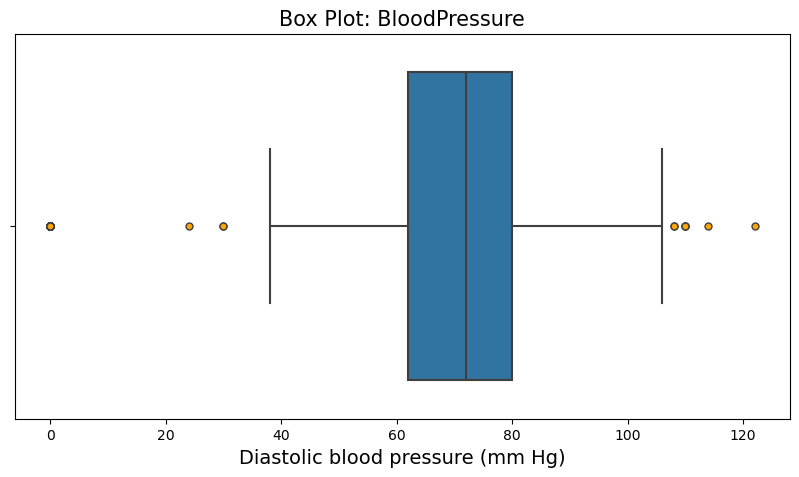

In [17]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(x = df.BloodPressure, flierprops = dict(markerfacecolor = 'orange', marker = 'o'))
plt.title('Box Plot: BloodPressure', fontsize=15)
plt.xlabel('Diastolic blood pressure (mm Hg)', fontsize=14)
plt.show()

### Exercise 4.2 - anomaly detection (15 points)
Extract features 'BMI' and 'Insulin' from the diabetes dataset.<br >
Implement anomaly detection using the One-Class SVM algorithm.<br >
Plot a scatter plot similar to Lecture 2 Slide 11, annotating the outlier data points.

Text(0, 0.5, 'Insulin')

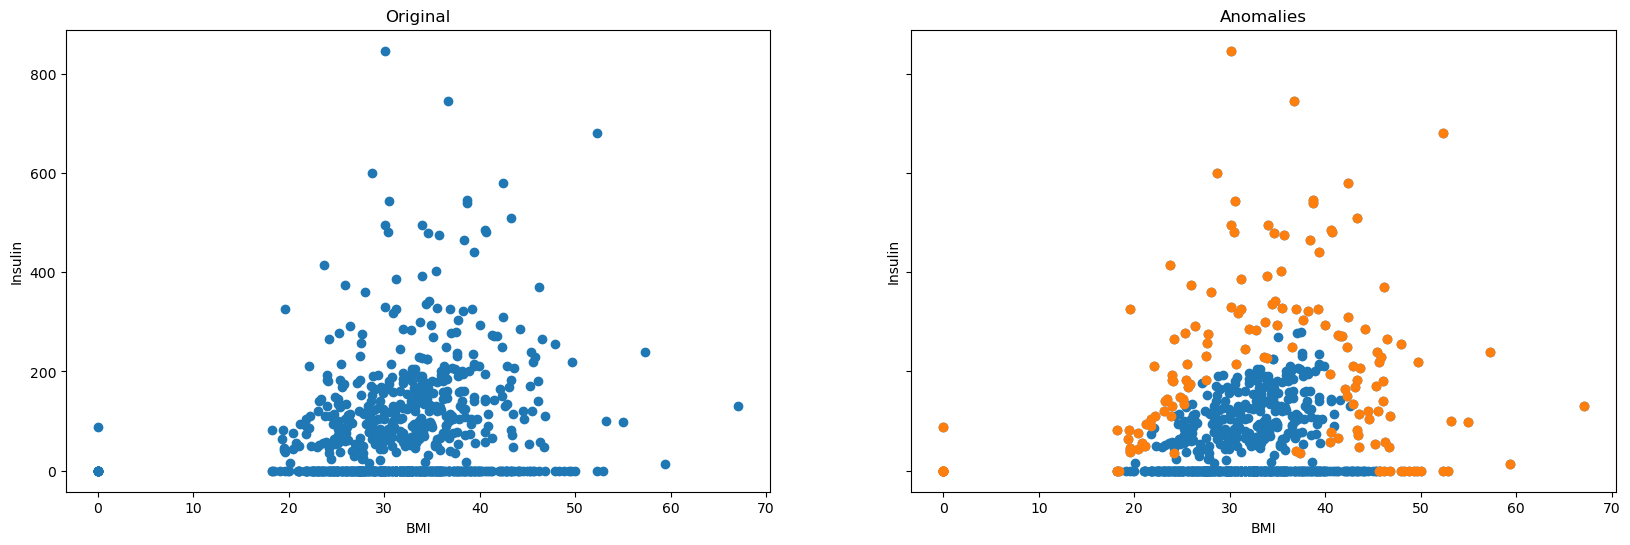

In [18]:
relevant_features = [
  "BMI",
  "Insulin"
]

Data = df[relevant_features]

#Data["BMI"] = np.log((Data["BMI"] + 0.1).astype(float)) 
#Data["Insulin"] = np.log((Data["Insulin"] + 0.1).astype(float)) 

# Converting Data Frame to a 2D array
input = Data.to_numpy()
# Training one-class-svm with input data: 

svm = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.2)
# fit method fits the model on the training data
svm.fit(input)
# predict method performs predictions on testing instances based on the learned parameters during fit. 
pred = svm.predict(input)

# ----------------- The model has been trained and tested on input data. 
# Extracting the negative outputs as outliers 
anom_index = where(pred==-1)
values = input[anom_index]

# Visualizing the results in a plot by showing the ground truth (original data) and highlighting the anomalies with a color.
# Visualize the actual and predicted anomalies
fig, (ax0, ax1)=plt.subplots(1,2, sharey=True, figsize=(20,6))

# Ground truth
ax0.set_title('Original')
ax0.scatter(Data["BMI"], Data["Insulin"])
ax0.set_xlabel('BMI')
ax0.set_ylabel('Insulin')

ax1.set_title('Anomalies')
ax1.scatter(input[:,0], input[:,1])
ax1.scatter(values[:,0], values[:,1])
ax1.set_xlabel('BMI')
ax1.set_ylabel('Insulin')
